In [14]:
import os
import sys
import re
import random
import math
import matplotlib
import pandas as pd
import numpy as np
import ipaddress as ip
from os.path import split
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection, tree, linear_model
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import tree, DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [15]:
#custom tokenizer for URLs. 
#first split - "/"
#second split - "-"
#third split - "."
#remove ".com" (also "http://", but i dont have "http://" in the dataset)
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens = []
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokensByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

#function to remove "http://" from URL
def trim(url):
    return re.match(r'(?:\w*://)?(?:.*\.)?([a-zA-Z-1-9]*\.[a-zA-Z]{1,}).*', url).groups()[0]


In [16]:
df = pd.read_csv(r'C:\Users\Kephas\Desktop\moretraining\dataset.csv',',',error_bad_lines=False)
df=df.sample(frac=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL,Lable
0,http://www.copiflex.pl/redirect.htm,1
1,http://www.sport.co.uk/football/liverpool/,0
2,http://lapazny.com/zz/Optus.html,1
3,http://www.kloshpro.com/js/db/b/db/a/3/dropbx....,1
4,http://lsotecnologia.com.br/recadastramento_ob...,1


In [17]:
len(df) #displaying 5 records

7030

In [18]:
#data['url'].values
x = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [19]:
#convert it into numpy array and shuffle the dataset
df = np.array(df)
random.shuffle(df)

In [20]:
#convert text data into numerical data for machine learning models
y = [d[1] for d in df]
corpus = [d[0] for d in df]
vectorizer = TfidfVectorizer(tokenizer=getTokens)
X = vectorizer.fit_transform(corpus)

In [21]:
#split the data set inot train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
model = { "CART":tree.DecisionTreeClassifier(max_depth=10),
         "MNB":MultinomialNB(),
         "LogisticRegression":LogisticRegression()   
}

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2)

In [24]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %.2f " % (algo, score))
    results[algo] = score

CART : 0.91 
MNB : 0.98 
LogisticRegression : 0.96 


In [25]:
winner = max(results, key=results.get)
print("Best algorithm:", winner,results[winner])

Best algorithm: MNB 0.9772403982930299


CART : 0.91 
MNB : 0.98 
LogisticRegression : 0.96 
Suitable algorithm: MNB 0.9772403982930299


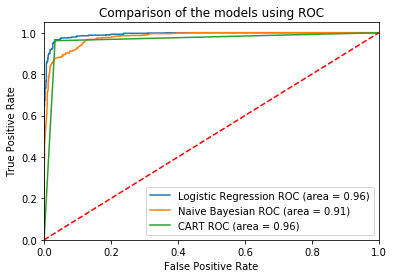

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model = { "CART":tree.DecisionTreeClassifier(max_depth=10),
         "MNB":MultinomialNB(),
         "LogisticRegression":LogisticRegression()   
}
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %.2f " % (algo, score))
    results[algo] = score
plt.figure()

winner = max(results, key=results.get)
print("Suitable algorithm:", winner,results[winner])

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Naive Bayesian',
    'model': GradientBoostingClassifier(),
},
{
     'label':'CART', 
     'model': DecisionTreeClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    # select the model
    model = m['model'] 
     # train the model
    model.fit(X_train, y_train)
    # predict the test data
    y_pred=model.predict(X_test) 
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of the models using ROC')
plt.legend(loc="lower right")
plt.show()  